In [11]:
# This script extracts the title, link, and short description of search results on Google 

#import all libraries
import pandas as pd
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup as bs
import requests


In [12]:
# input for keyword, number of pages to scrape, and google baseURL
query = 'stocks'
nPages = 2
baseurl = "http://www.google.com/search?q="



In [13]:
# Access chromedriver and determine path 
driver = webdriver.Chrome(ChromeDriverManager().install())
pathToFile = '/Users/zacharywong/github/zacharywong2023/DigitalHealthWebscrape/Deliverables/'




====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/zacharywong/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache
/var/folders/gl/jgk7f2w528qgjggck6glqp200000gn/T/ipykernel_65149/2685044722.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [14]:
# list of dictionaries with key/value pairs: title, link, text
# Contains all information for all search results 
pageInfo = []

In [15]:
# helper function to extract links from 1 page of results
def extractLink(soup):
    links = []
    searchLinks = soup.find_all('div', class_ = 'yuRUbf')
    for h in searchLinks:
        link = h.a.get('href')
        links.append(link)
    return links 

In [16]:
# helper function to extract texts from 1 page of results
def extractText(soup):
    texts = []
    searchText = soup.find_all('div', class_='VwiC3b yXK7lf MUxGbd yDYNvb lyLwlc lEBKkf')
    for h in searchText:
        fullText = h.text
        try:
            splitText = fullText.split('— ', 1)
            text = splitText[1]
            texts.append(text);
        except:
            texts.append(fullText)
    return texts;

In [17]:
# helper function to extract titles from 1 page of results
def extractTitle(soup):
    titles = [] 
    searchTitles = soup.find_all('h3', class_='LC20lb MBeuO DKV0Md')
    for h in searchTitles:
        titles.append(h.text)
    return titles

In [18]:
# helper function to add 1 page of results to pageInfo list
def addToPageInfo(titles, links, texts):
    index = 0;
    while (index < len(titles)):
        # create new dictionary of each search results' title, link, and text
        pageInfo.append({"Title": titles[index], "Link": links[index], "About": texts[index]})
        index+=1 
    

<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta charset="utf-8"/><meta content="origin" name="referrer"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>stocks - Google Search</title><script async="" nonce="" src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.fQLVS3SAB_U.O/m=gapi_iframes,googleapis_client/rt=j/sv=1/d=1/ed=1/rs=AHpOoo9-gtqpJORJvBFDdao_eAhWe8xjHw/cb=gapi.loaded_0"></script><script nonce="">(function(){
var b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){window.google={kEI:'mpMgYp6mCN2qptQPnISVuAU',kEXPI:'31',kBL:'xVU9'};google.sn='web';google.kHL='en';})();(function(){
var f=this||self;var h,k=[];function l(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||h}function m(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b
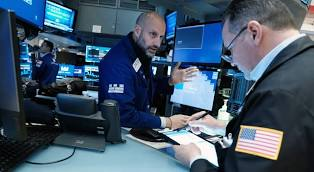
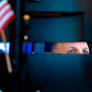
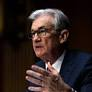
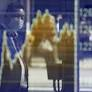
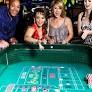
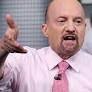
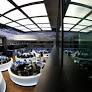
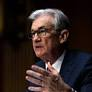
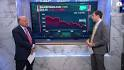
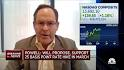
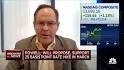
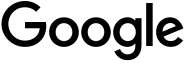

IndexError: list index out of range

In [19]:
#capture links, header, and text
#pageInfo is a list of dictionaries for each page with keys/value pairs: header, link, text

# extract and load each page of results to pageInfo 
for page in range(1, nPages+1):
    url = baseurl + query+ "&start=" + str((page - 1)*10)
    driver.get(url)
    soup = bs(driver.page_source, 'html.parser')
    links = extractLink(soup);
    texts = extractText(soup);
    titles = extractTitle(soup);
    addToPageInfo(titles, links, texts)
    
pageInfo 

        
    

In [ ]:
# convert pageInfo to pandas dataframe and export as csv 
df = pd.DataFrame(pageInfo)
df.to_csv(pathToFile + 'Search_Results.csv')